## MPG 데이터 분석
미국에서 생산된 자동차의 정보

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 데이터 가져오기

In [2]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 데이터 살펴보기
- manufacturer : 제조사. 문자열
- model : 자동차 모델명, 문자열
- displ : 배기량, 숫자
- year : 생년년도, 숫자
- cyl : 실린더개수, 숫자
- trans : 변속기 종류, 문자열
- drv : 구동방식, 문자열
- cty : 도시연비, 숫자
- hwy : 고속도로연비, 숫자
- fl : 연료종류, 문자열, (c : 가스, d : 디젤, e : 에탄올 혼합연료, p : 고급휘발유, r : 일반휘발유)
- class : 자동차 종류, 문자열

In [3]:
# 요약 정보 확인하기.
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


### 문제1 
- 자동차 배기량에 따라 고속도로 연비가 다른지 살펴본다.
- displ(배기량)의 평균을 구해서 평균 이하와 평균 초과 자동차들 간의 고속도로 연비를 비교해본다.

In [4]:
# 배기량을 기준으로 그룹을 묶고 고속도 연비 평균을 구한다.
a1 = mpg_df.groupby('displ')['hwy'].mean()
a1

displ
1.6    31.600000
1.8    31.642857
1.9    43.000000
2.0    28.238095
2.2    27.333333
2.4    28.846154
2.5    26.800000
2.7    21.750000
2.8    24.900000
3.0    25.125000
3.1    25.666667
3.3    22.000000
3.4    18.000000
3.5    27.000000
3.6    26.000000
3.7    18.666667
3.8    24.750000
3.9    17.000000
4.0    19.600000
4.2    18.750000
4.4    18.000000
4.6    18.818182
4.7    15.647059
5.0    17.000000
5.2    15.800000
5.3    18.833333
5.4    17.250000
5.6    18.000000
5.7    19.000000
5.9    15.000000
6.0    17.000000
6.1    14.000000
6.2    25.500000
6.5    17.000000
7.0    24.000000
Name: hwy, dtype: float64

In [5]:
# 인덱스를 데이터 프레임의 데이터로 포함시킨다.
df1 = pd.DataFrame(a1)
df1.reset_index(inplace=True)
df1

,displ,hwy
0,1.6,31.600000
1,1.8,31.642857
2,1.9,43.000000
3,2.0,28.238095
4,2.2,27.333333
5,2.4,28.846154
6,2.5,26.800000
7,2.7,21.750000
8,2.8,24.900000
9,3.0,25.125000


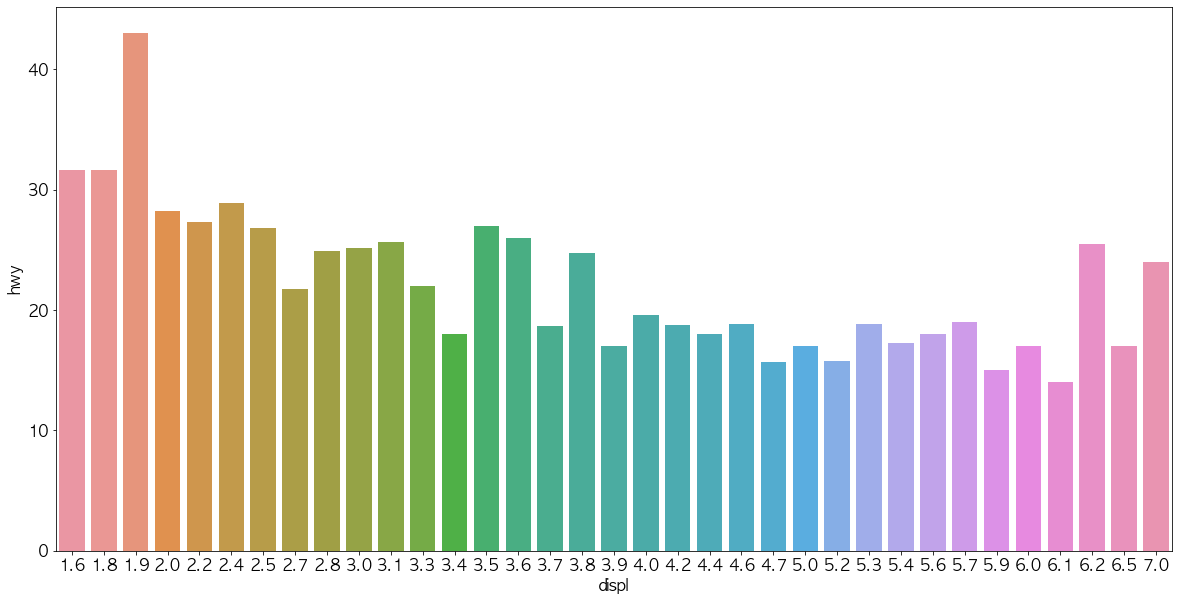

In [6]:
sns.barplot(data=df1, x='displ', y='hwy')
plt.show()

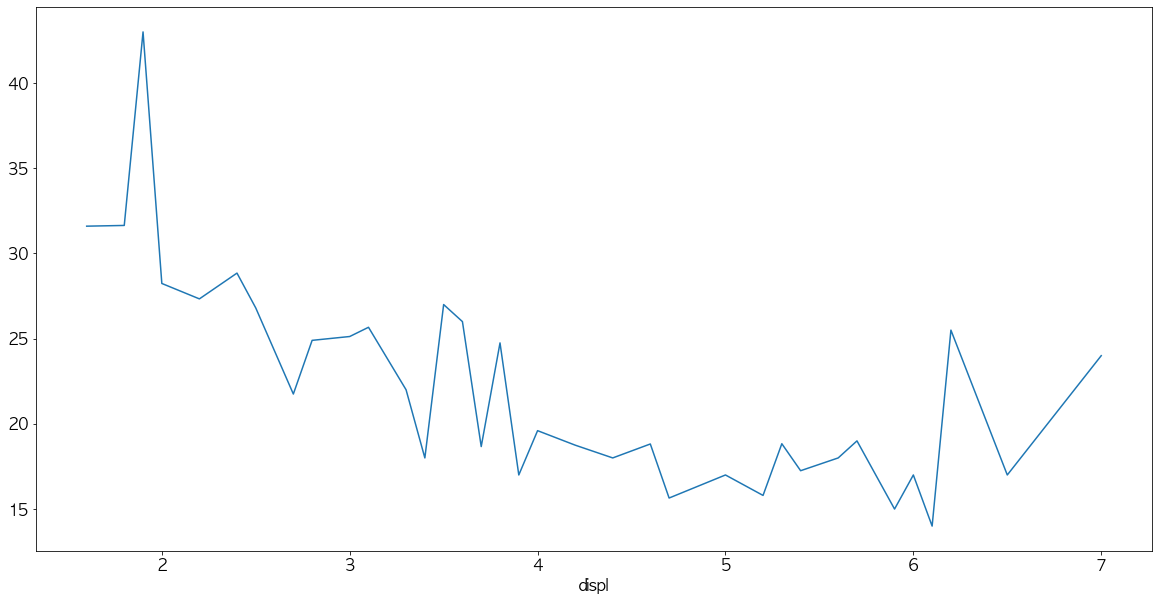

In [7]:
a1.plot()
plt.show()

In [8]:
# 전체 배기량 평균을 구한다.
displ_mean = mpg_df['displ'].mean()
displ_mean

3.4717948717948697

In [9]:
# 배기량 평균 이하들의 고속도로 연비 평균을 구한다.
mpg_a = mpg_df.query('displ <= @displ_mean')
hwy_mean1 = mpg_a['hwy'].mean()
hwy_mean1

27.133858267716537

In [10]:
# 배기량 평균 초과들의 고속도로 연비 평균을 구한다.
mpg_b = mpg_df.query('displ > @displ_mean')
hwy_mean2 = mpg_b['hwy'].mean()
hwy_mean2

19.05607476635514

,배기량 평균 이하,배기량 평균 초과
고속도로 연비 평균,27.133858,19.056075


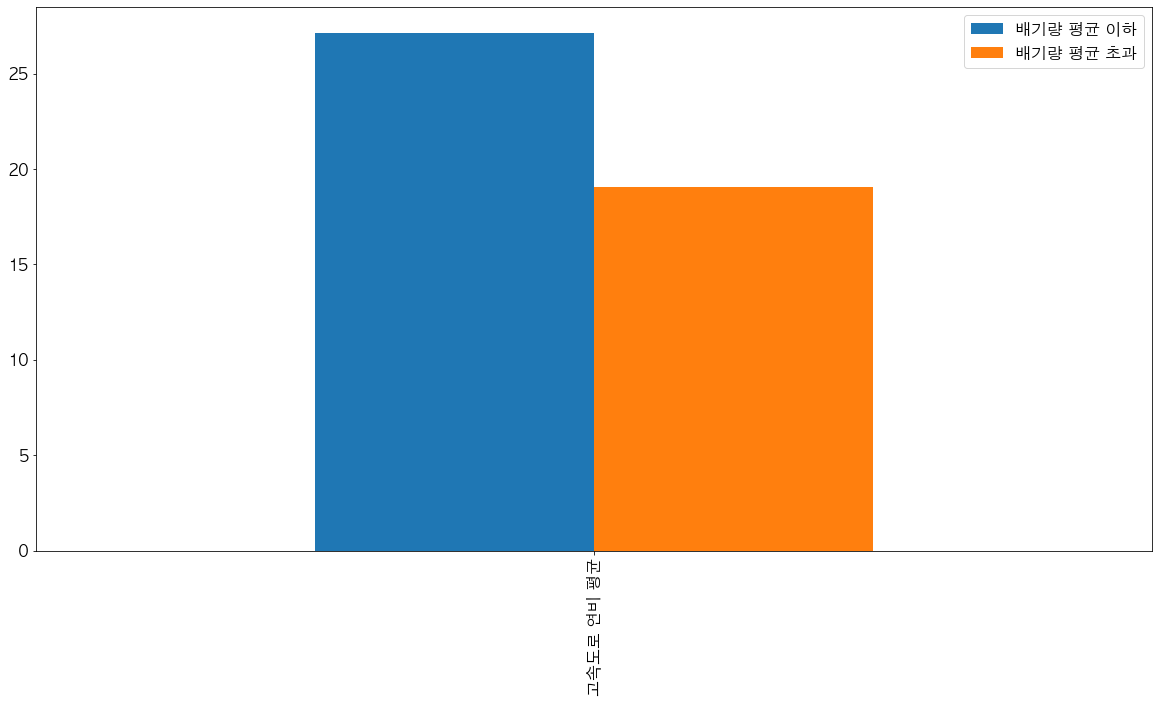

In [11]:
d1 = {
    '배기량 평균 이하' : [hwy_mean1],
    '배기량 평균 초과' : [hwy_mean2]
}

tmp_df = pd.DataFrame(d1, index=['고속도로 연비 평균'])
display(tmp_df)

tmp_df.plot.bar()
plt.show()

,고속도로 평균연비
배기량 평균이하,27.133858
배기량 평균초과,19.056075


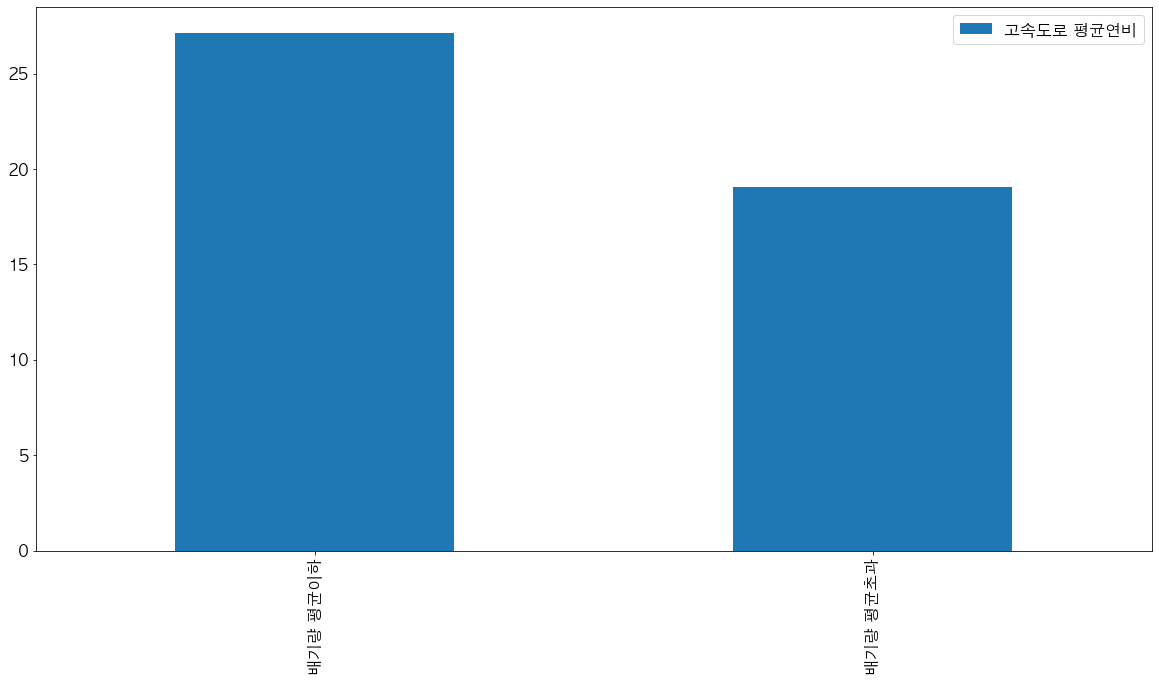

In [12]:
d1 = {
    '고속도로 평균연비' : [hwy_mean1, hwy_mean2]
}
tmp_df = pd.DataFrame(d1)
tmp_df.index = ['배기량 평균이하', '배기량 평균초과']
display(tmp_df)

tmp_df.plot.bar()
plt.show()

,배기량,고속도로 평균 연비
0,평균이하,27.133858
1,평균초과,19.056075


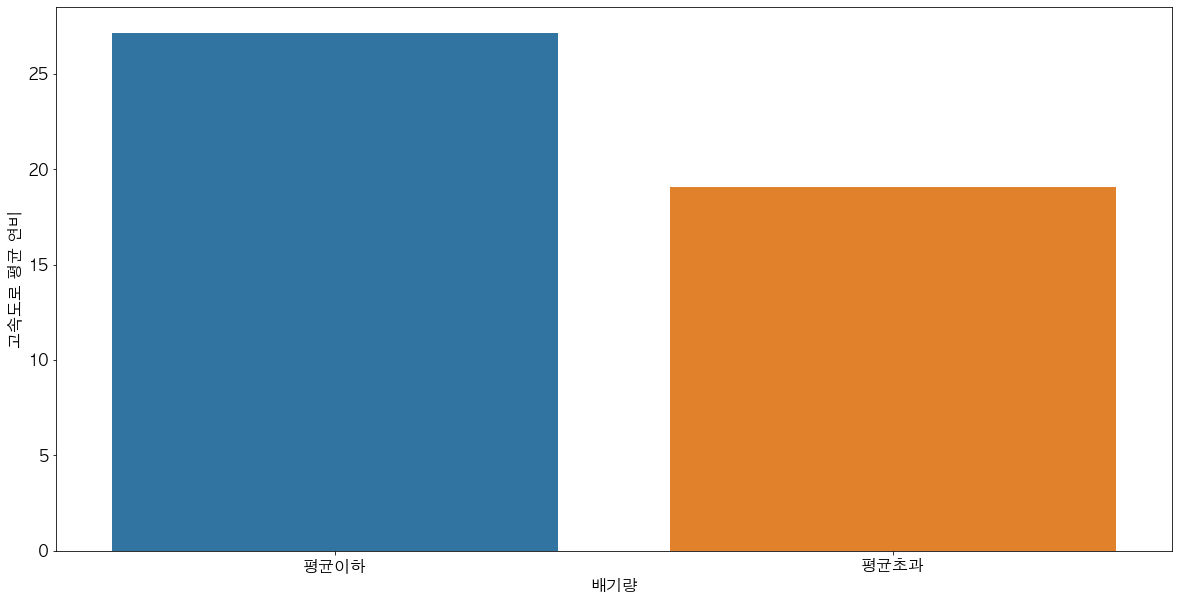

In [13]:
d1 = {
    '배기량' : ['평균이하', '평균초과'],
    '고속도로 평균 연비' : [hwy_mean1, hwy_mean2]
}
tmp_df = pd.DataFrame(d1)
display(tmp_df)

sns.barplot(data=tmp_df, x='배기량', y='고속도로 평균 연비')
plt.show()

### 문제2) 자동차 회사별 시내 연비가 다른지 확인한다.

In [14]:
# 자동차 회사명과 시내 연비를 가져온다.
a1 = mpg_df[['manufacturer', 'cty']]
a1

,manufacturer,cty
0,audi,18
1,audi,21
2,audi,20
3,audi,21
4,audi,16
...,...,...
229,volkswagen,19
230,volkswagen,21
231,volkswagen,16
232,volkswagen,18


In [15]:
# 자동차 회사별로 그룹을 묶어 시내연비 평균을 구한다.
a2 = a1.groupby('manufacturer').mean()
a2

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [16]:
# 데이터 프레임의 값을 기준으로 정렬한다.
# sort_index : 인덱스를 기준으로 정렬, 기본으 오름차순
# ascending : False를 주면 내림차순이 된다.
a2.sort_index(inplace=True, ascending=False)
a2

,cty
manufacturer,
volkswagen,20.925926
toyota,18.529412
subaru,19.285714
pontiac,17.000000
nissan,18.076923
mercury,13.250000
lincoln,11.333333
land rover,11.500000
jeep,13.500000


In [17]:
# 값을 기준으로 정렬한다.
# sort_values : 컬럼을 지정하여 컬럼의 값을 기준으로 정렬한다.
# 첫 번째 : 기준이 되는 컬럼
# 두 번째 : False를 주면 내림 차순 정렬, 생략시 오름차순 정렬
a2.sort_values('cty', ascending=False, inplace=True)
a2

,cty
manufacturer,
honda,24.444444
volkswagen,20.925926
subaru,19.285714
hyundai,18.642857
toyota,18.529412
nissan,18.076923
audi,17.611111
pontiac,17.000000
chevrolet,15.000000


In [18]:
# 시각화를 위해 인덱스를 데이터에 포함한다.
a2.reset_index(inplace=True)
a2

,manufacturer,cty
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


In [19]:
# 컬럼의 이름을 변경한다.
a2.columns = ['제조사', '도시 연비 평균']
a2

,제조사,도시 연비 평균
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


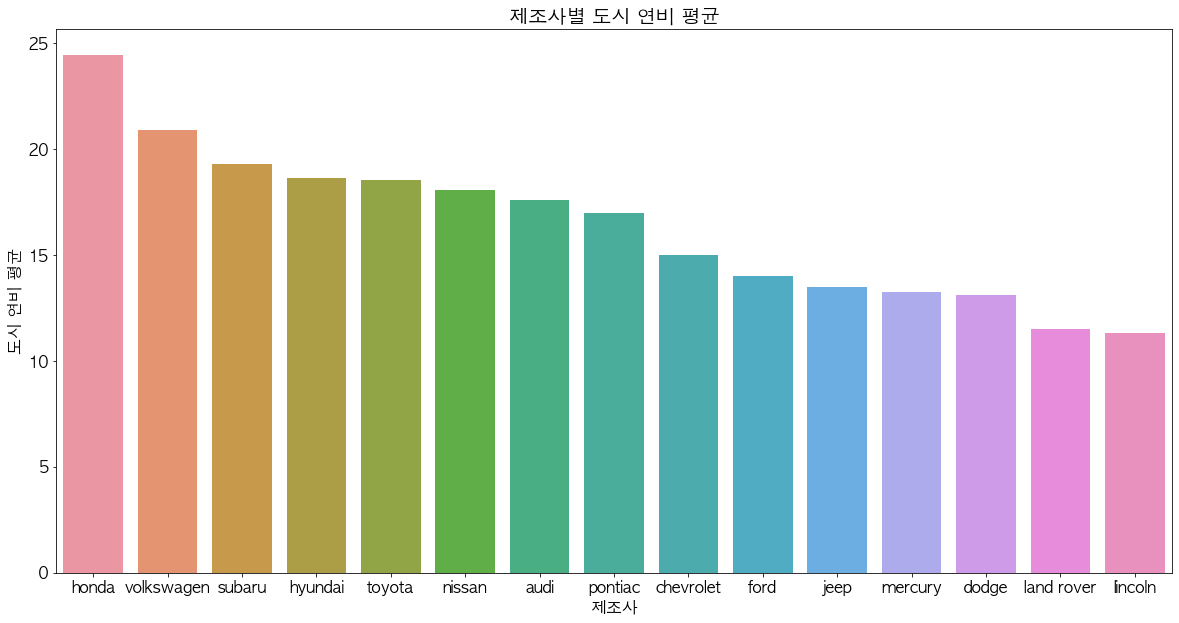

In [20]:
# 시각화
sns.barplot(data=a2, x='제조사', y='도시 연비 평균')
plt.title('제조사별 도시 연비 평균')
plt.show()

### 문제3) 구동 방식(drv)별 평균 고속도로 연비를 확인한다.

In [21]:
# 구동 방식과 고속도로 연비를 가져온다.
a1 = mpg_df[['drv', 'hwy']]
a1

,drv,hwy
0,f,29
1,f,29
2,f,31
3,f,30
4,f,26
...,...,...
229,f,28
230,f,29
231,f,26
232,f,26


In [22]:
# 구동방식별 고속도로 연비 평균을 구한다.
a2 = a1.groupby('drv').mean()
a2

,hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [23]:
# 고속도로 연비 평균을 기준으로 내림 차순으로 정렬한다.
a2.sort_values('hwy', ascending=False, inplace=True)
a2

,hwy
drv,
f,28.160377
r,21.000000
4,19.174757


In [24]:
# 인덱스를 컬럼으로 포함시킨다.
a2.reset_index(inplace=True)
a2

,drv,hwy
0,f,28.160377
1,r,21.000000
2,4,19.174757


In [25]:
# 컬럼 이름 변경
a2.columns = ['구동방식', '고속도로 연비 평균']
a2

,구동방식,고속도로 연비 평균
0,f,28.160377
1,r,21.000000
2,4,19.174757


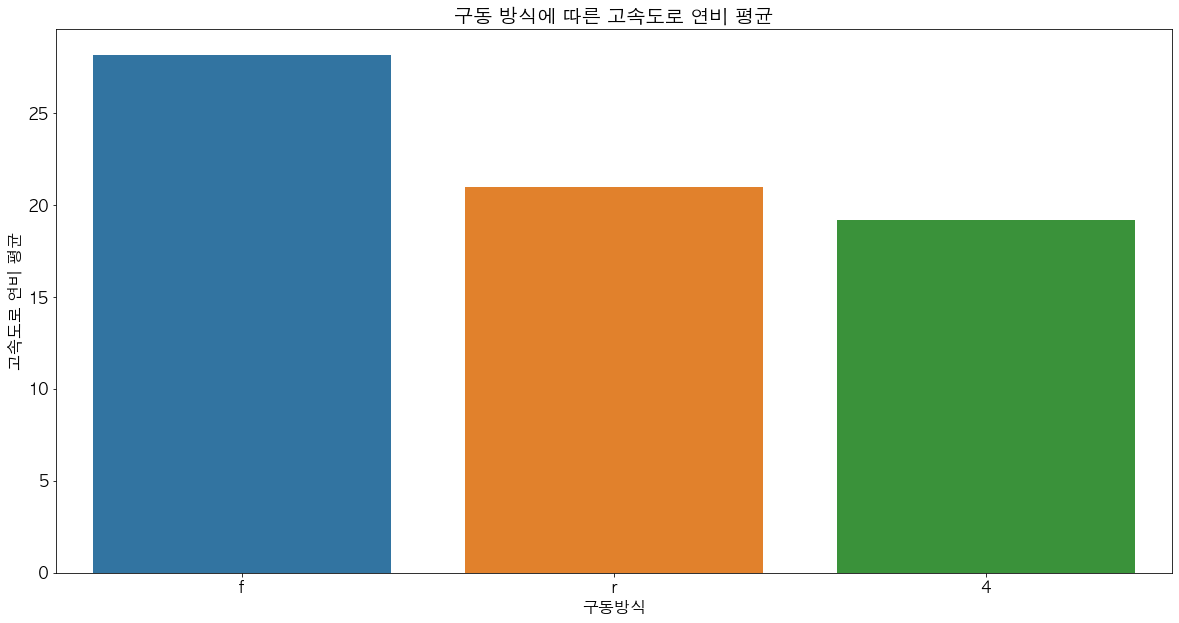

In [26]:
# 시각화
sns.barplot(data=a2, x='구동방식', y='고속도로 연비 평균')
plt.title('구동 방식에 따른 고속도로 연비 평균')
plt.show()

### 문제4) 자동차 종류(class)별 평균 시내 연비를 확인한다.

In [27]:
# 자동차 종류와 시내 연비를 가져온다.
a1 = mpg_df[['class', 'cty']]
a1

,class,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16
...,...,...
229,midsize,19
230,midsize,21
231,midsize,16
232,midsize,18


In [28]:
# class 별 시내연비 평균을 구한다.
a2 = a1.groupby('class', as_index=False).mean()
a2

,class,cty
0,2seater,15.400000
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
4,pickup,13.000000
5,subcompact,20.371429
6,suv,13.500000


In [29]:
# cty를 기준으로 내림차순 정렬한다.
a2.sort_values('cty', ascending=False, inplace=True)
a2

,class,cty
5,subcompact,20.371429
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
0,2seater,15.400000
6,suv,13.500000
4,pickup,13.000000


In [30]:
# 컬럼명을 변경한다.
a2.columns = ['자동차 종류', '시내연비 평균']
a2

,자동차 종류,시내연비 평균
5,subcompact,20.371429
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
0,2seater,15.400000
6,suv,13.500000
4,pickup,13.000000


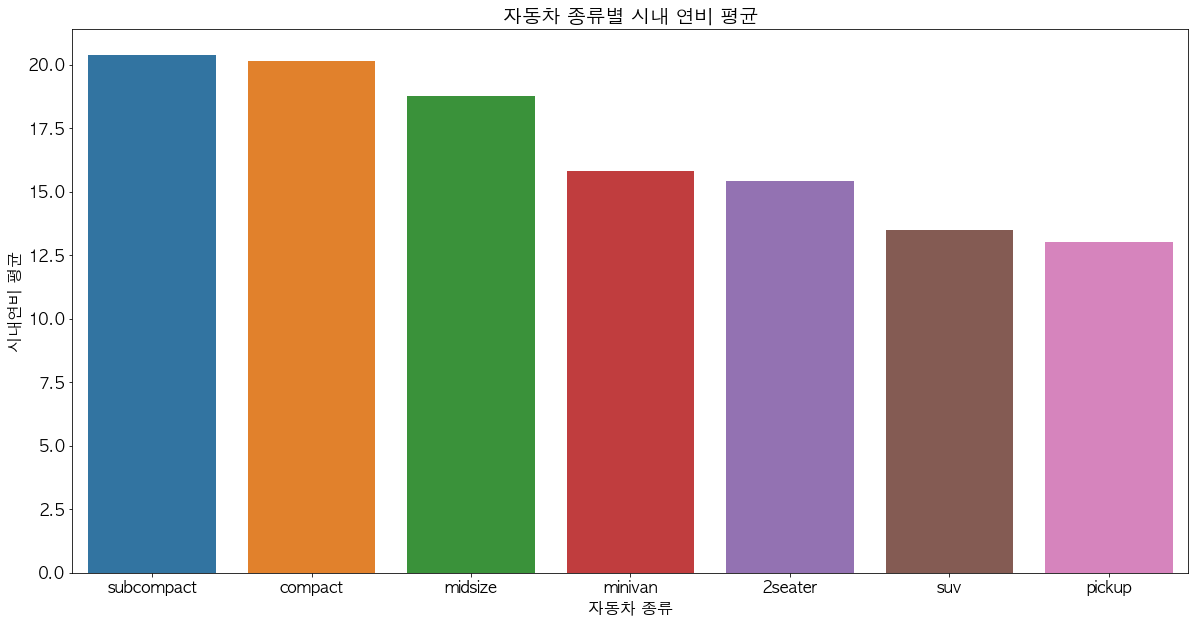

In [31]:
# 시각화
sns.barplot(data=a2, x='자동차 종류', y='시내연비 평균')
plt.title('자동차 종류별 시내 연비 평균')
plt.show()

### 문제5) 각 회사별 연료 종류별 자동차수를 확인한다.

In [32]:
# 데이터를 가져온다.
a1 = mpg_df[['manufacturer', 'fl', 'model']]
a1

,manufacturer,fl,model
0,audi,p,a4
1,audi,p,a4
2,audi,p,a4
3,audi,p,a4
4,audi,p,a4
...,...,...,...
229,volkswagen,p,passat
230,volkswagen,p,passat
231,volkswagen,p,passat
232,volkswagen,p,passat


In [33]:
# 그룹 통계
a2 = a1.groupby(['manufacturer', 'fl'], as_index=False).count()
a2

,manufacturer,fl,model
0,audi,p,18
1,chevrolet,d,1
2,chevrolet,e,2
3,chevrolet,p,5
4,chevrolet,r,11
5,dodge,e,5
6,dodge,r,32
7,ford,p,1
8,ford,r,24
9,honda,c,1


In [34]:
# pivot table을 구한다.
a3 = a2.pivot(index='manufacturer', columns='fl', values='model')
a3

fl,c,d,e,p,r
manufacturer,,,,,
audi,NaN,NaN,NaN,18.0,NaN
chevrolet,NaN,1.0,2.0,5.0,11.0
dodge,NaN,NaN,5.0,NaN,32.0
ford,NaN,NaN,NaN,1.0,24.0
honda,1.0,NaN,NaN,2.0,6.0
hyundai,NaN,NaN,NaN,NaN,14.0
jeep,NaN,1.0,1.0,1.0,5.0
land rover,NaN,NaN,NaN,2.0,2.0
lincoln,NaN,NaN,NaN,1.0,2.0


In [35]:
# 결측치를 0으로 채워준다.
a3.fillna(0, inplace=True)
a3

fl,c,d,e,p,r
manufacturer,,,,,
audi,0.0,0.0,0.0,18.0,0.0
chevrolet,0.0,1.0,2.0,5.0,11.0
dodge,0.0,0.0,5.0,0.0,32.0
ford,0.0,0.0,0.0,1.0,24.0
honda,1.0,0.0,0.0,2.0,6.0
hyundai,0.0,0.0,0.0,0.0,14.0
jeep,0.0,1.0,1.0,1.0,5.0
land rover,0.0,0.0,0.0,2.0,2.0
lincoln,0.0,0.0,0.0,1.0,2.0


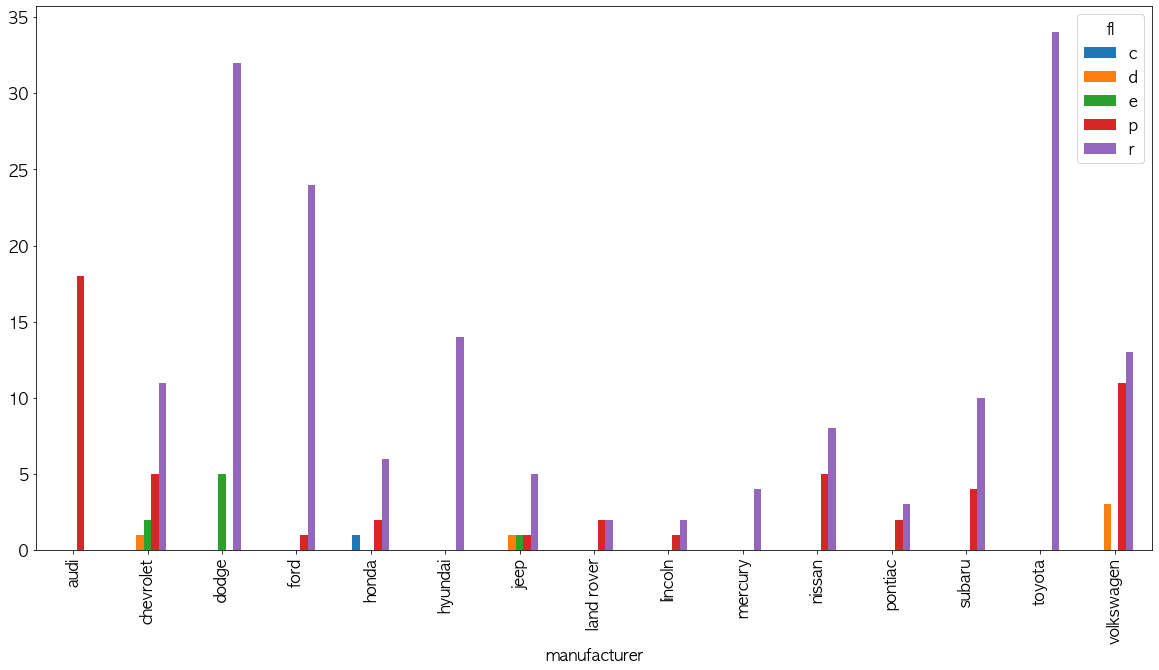

In [36]:
# 시각화
a3.plot.bar()
plt.show()